In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
house = pd.read_csv('Maison.csv')

In [3]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [4]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [5]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [6]:
#shape of train data
house.shape

(546, 12)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [8]:
house_c = house.copy()

In [9]:
house_c

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [10]:
house

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [11]:
house_c.head(10)

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0
7,69000,4160,3,1,3,1,0,0,0,0,0,0
8,83800,4800,3,1,1,1,1,1,0,0,0,0
9,88500,5500,3,2,4,1,1,0,0,1,1,0


In [20]:
house_c.groupby('garage').count()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,situation
garage,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,300
1,126,126,126,126,126,126,126,126,126,126,126
2,108,108,108,108,108,108,108,108,108,108,108
3,12,12,12,12,12,12,12,12,12,12,12


In [22]:
house_c.groupby('driveway').count()

,price,area,rooms,bathroom,floors,game_room,cellar,gas,air,garage,situation
driveway,,,,,,,,,,,
0,77,77,77,77,77,77,77,77,77,77,77
1,469,469,469,469,469,469,469,469,469,469,469


In [23]:
house_c.groupby('situation').count()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage
situation,,,,,,,,,,,
0,418,418,418,418,418,418,418,418,418,418,418
1,128,128,128,128,128,128,128,128,128,128,128


In [24]:
house_c.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [32]:
house_c.drop('driveway', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
house_c.drop('game_room', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
house_c.drop('cellar', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
house_c.drop('gas', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
house_c.drop('air', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
house_c.drop('situation', axis=1, inplace=True)

/home/shefali/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
house_c

,price,area,rooms,bathroom,floors,garage
0,42000,5850,3,1,2,1
1,38500,4000,2,1,1,0
2,49500,3060,3,1,1,0
3,60500,6650,3,1,2,0
4,61000,6360,2,1,1,0
...,...,...,...,...,...,...
541,91500,4800,3,2,4,0
542,94000,6000,3,2,4,0
543,103000,6000,3,2,4,1
544,105000,6000,3,2,2,1


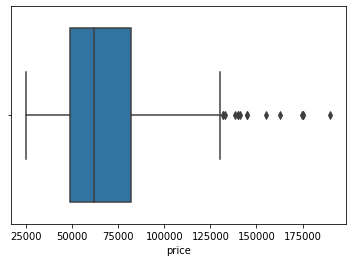

In [26]:
x = sns.boxplot(house_c['price'])

In [28]:
Q1=house_c['price'].quantile(0.25)
Q3=house_c['price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

49125.0
82000.0
32875.0
-187.5 131312.5


In [40]:
house_c = house_c[house_c['price']< Upper_Whisker]

In [41]:
house_c.shape

(531, 6)

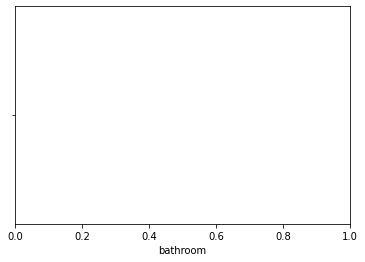

In [69]:
x = sns.boxplot(house_c['bathroom'])

In [53]:
Q1=house_c['area'].quantile(0.25)
Q3=house_c['area'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

3520.0
6047.5
2527.5
-271.25 9838.75


In [54]:
house_c = house_c[house_c['area']< Upper_Whisker]

In [55]:
house_c.shape

(514, 6)

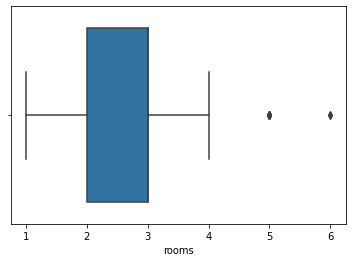

In [51]:
x = sns.boxplot(house_c['rooms'])

In [56]:
Q1=house_c['rooms'].quantile(0.25)
Q3=house_c['rooms'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.0
3.0
1.0
0.5 4.5


In [59]:
house_c = house_c[house_c['rooms']< Upper_Whisker]

In [60]:
house_c.shape

(0, 6)

In [70]:
house_c

,price,area,rooms,bathroom,floors,garage


---------------------------------------------------------

In [191]:
house_new_data2 = house.copy()

In [192]:
house_new_data2.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [73]:
#checking box plot

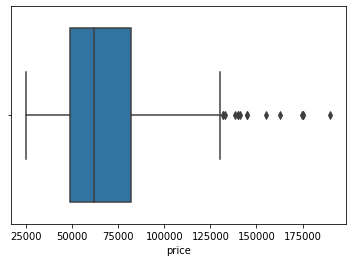

In [193]:
sns.boxplot(house_new_data2['price'])

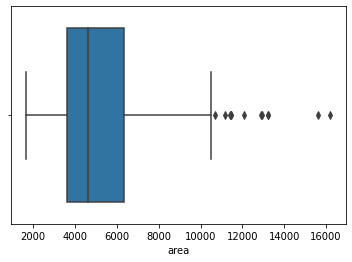

In [194]:
sns.boxplot(house_new_data2['area'])

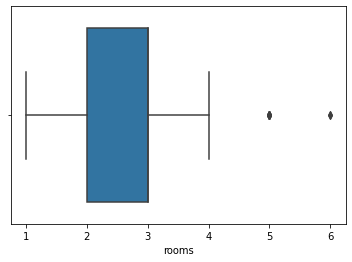

In [195]:
sns.boxplot(house_new_data2['rooms'])

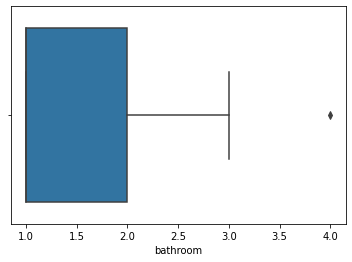

In [196]:
sns.boxplot(house_new_data2['bathroom'])

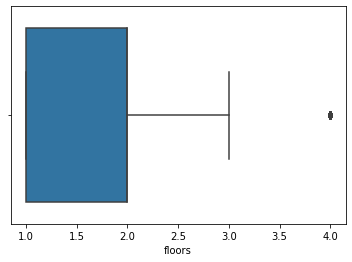

In [197]:
sns.boxplot(house_new_data2['floors'])

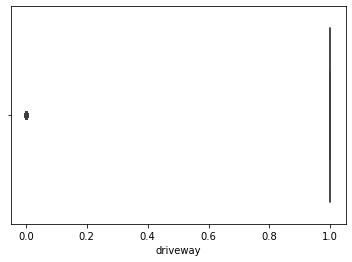

In [198]:
sns.boxplot(house_new_data2['driveway'])

In [199]:
house_new_data2 = house_new_data2.drop(columns = ['driveway'])

In [200]:
house_new_data2.head()

,price,area,rooms,bathroom,floors,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,0,1,0,0,1,0
1,38500,4000,2,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,0,0,0,0,0
4,61000,6360,2,1,1,0,0,0,0,0,0


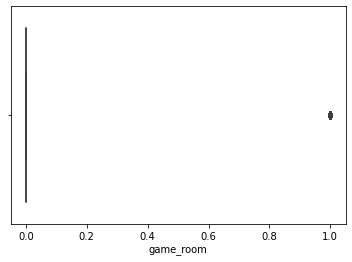

In [201]:
sns.boxplot(house_new_data2['game_room'])

In [202]:
house_new_data2 = house_new_data2.drop(columns = ['game_room'])

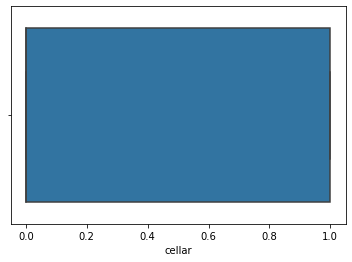

In [203]:
sns.boxplot(house_new_data2['cellar'])

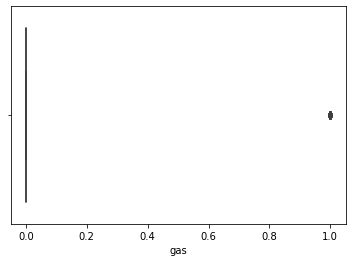

In [204]:
sns.boxplot(house_new_data2['gas'])

In [205]:
house_new_data2 = house_new_data2.drop(columns = ['gas'])

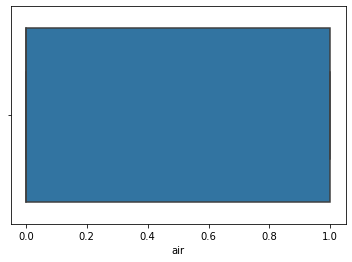

In [206]:
sns.boxplot(house_new_data2['air'])

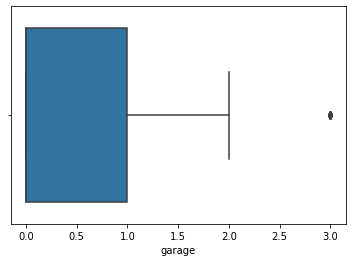

In [207]:
sns.boxplot(house_new_data2['garage'])

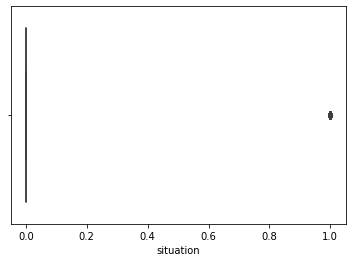

In [208]:
sns.boxplot(house_new_data2['situation'])

In [209]:
house_new_data2 = house_new_data2.drop(columns = ['situation'])

In [210]:
house_new_data2.head()

,price,area,rooms,bathroom,floors,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


In [211]:
house_new_data2.shape

(546, 8)

In [212]:
Q1=house_new_data2['price'].quantile(0.25)
Q3=house_new_data2['price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

49125.0
82000.0
32875.0
-187.5 131312.5


In [214]:
house_new_data2 = house_new_data2[house_new_data2['price']< Upper_Whisker]

In [215]:
house_new_data2.shape

(531, 8)

In [216]:
Q1=house_new_data2['area'].quantile(0.25)
Q3=house_new_data2['area'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

3555.0
6310.5
2755.5
-578.25 10443.75


In [217]:
house_new_data2 = house_new_data2[house_new_data2['area']< Upper_Whisker]

In [218]:
house_new_data2.shape

(518, 8)

In [219]:
Q1=house_new_data2['rooms'].quantile(0.25)
Q3=house_new_data2['rooms'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.0
3.0
1.0
0.5 4.5


In [220]:
house_new_data2 = house_new_data2[house_new_data2['rooms']< Upper_Whisker]

In [221]:
house_new_data2.shape

(507, 8)

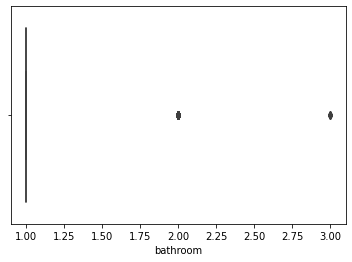

In [224]:
sns.boxplot(house_new_data2['bathroom'])

In [225]:
house_new_data2 = house_new_data2.drop(columns = ['bathroom'])

In [226]:
house_new_data2.head()

,price,area,rooms,floors,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


In [227]:
house_new_data2.shape

(507, 7)

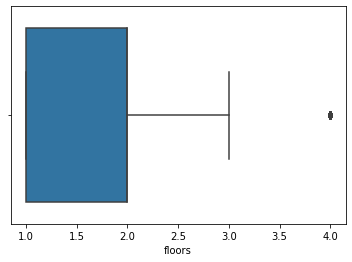

In [228]:
sns.boxplot(house_new_data2['floors'])

In [229]:
Q1=house_new_data2['floors'].quantile(0.25)
Q3=house_new_data2['floors'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

1.0
2.0
1.0
-0.5 3.5


In [230]:
house_new_data2 = house_new_data2[house_new_data2['floors']< Upper_Whisker]

In [231]:
house_new_data2.shape

(469, 7)

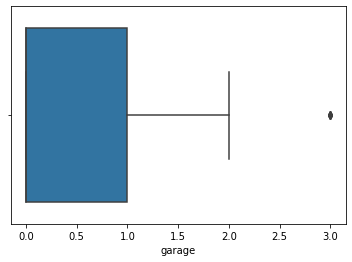

In [232]:
sns.boxplot(house_new_data2['garage'])

In [233]:
Q1=house_new_data2['garage'].quantile(0.25)
Q3=house_new_data2['garage'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
1.0
1.0
-1.5 2.5


In [234]:
house_new_data2 = house_new_data2[house_new_data2['garage']< Upper_Whisker]

In [235]:
house_new_data2.shape

(461, 7)

In [236]:
house_new_data2.head()

,price,area,rooms,floors,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


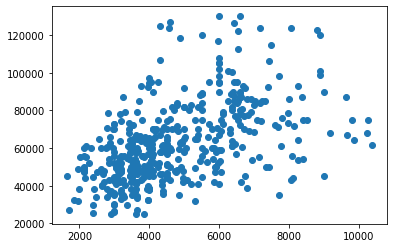

In [238]:
plt.scatter(house_new_data2['area'], house_new_data2['price'])
plt.show()

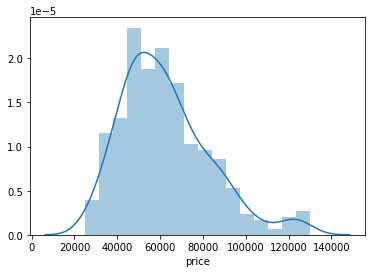

In [239]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house_new_data2['price'])
plt.show()

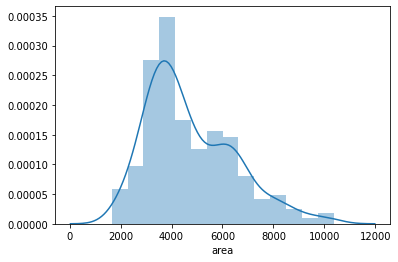

In [240]:
sns.distplot(house_new_data2['area'])
plt.show()

In [241]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [242]:
lm = LinearRegression()

In [243]:
# let's do the split of the dataset
house_new_data2.columns


Index(['price', 'area', 'rooms', 'floors', 'cellar', 'air', 'garage'], dtype='object')

In [250]:
X = house_new_data2[['area', 'rooms', 'floors', 'cellar', 'air', 'garage']]

Y = house_new_data2['price']

In [284]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 42)

In [285]:
X_test.head()

,area,rooms,floors,cellar,air,garage
245,2910,2,1,0,0,0
32,4000,2,1,0,0,0
42,4640,4,2,0,0,1
242,4770,3,1,1,0,0
137,7700,2,1,0,0,0


In [286]:
# Now let's build the model using sklearn
lm.fit(X_train, Y_train)

LinearRegression()

In [287]:
#Prediction
lm.score(X_test, Y_test)

0.49940784743809163

--------------------------------------------------------

In [288]:
import statsmodels.api as sm

In [289]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_test)

In [290]:
res = sm.OLS(Y_test, X_endog)
res.fit()

In [291]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     23.37
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.12e-18
Time:                        23:45:30   Log-Likelihood:                -1533.8
No. Observations:                 139   AIC:                             3082.
Df Residuals:                     132   BIC:                             3102.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5167.9852   6709.934      0.770      0.443   -8104.927    1.84e+04
area           4.4950      0.821      5.474      0.000       2.871       6.119
rooms       5733.9282   2353.292      2.437      0.016    1078.884    1.04e+04
floors      5590.3923   2286.543      2.445      0.016    1067.383    1.01e+04
cellar      9909.1486   2771.478      3.575      0.000    4426.891    1.54e+04
air         1.056e+04   2998.361      3.522      0.001    4630.402    1.65e+04
garage      6402.1223   1832.679      3.493      0.001    2776.902       1e+04
==============================================================================
Omnibus:                       14.385   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.363
Skew:                           0.590   Prob(JB):                     6.24e-05
Kurtosis:                       4.396   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = house_new_data2.select_dtypes(include=[np.number])

In [301]:
train_corr.shape

(461, 7)

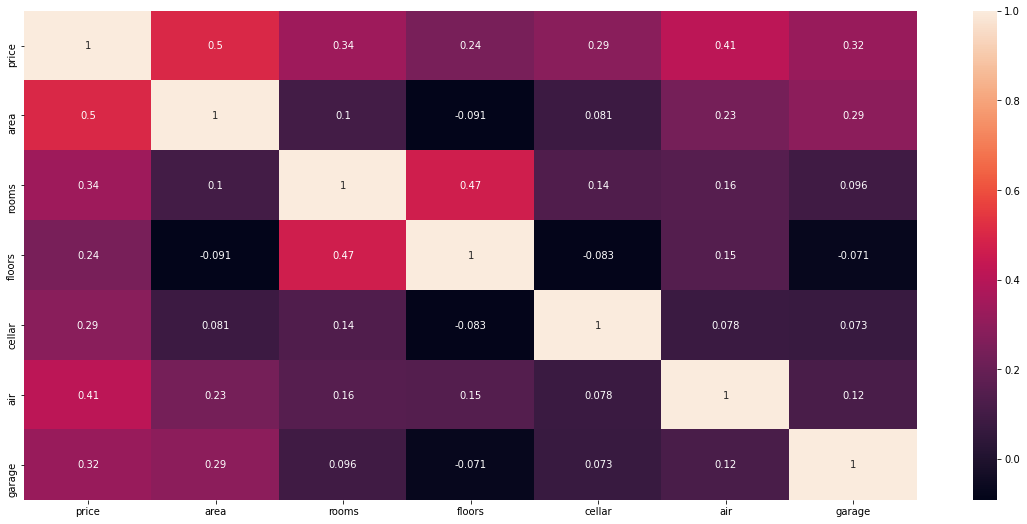

In [302]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

In [303]:
house_new_data2.area.unique()

array([ 5850,  4000,  3060,  6650,  6360,  4160,  3880,  4800,  3000,
        1700,  2880,  3600,  3185,  3300,  5200,  3450,  3986,  4785,
        4510,  3934,  4960,  3800,  4500,  3500,  4032,  5400,  3150,
        3745,  4520,  4640,  2000,  2160,  3040,  3090,  3350,  4100,
        9166,  4040,  3630,  3620,  2400,  4400,  4120,  4750,  4280,
        4820,  5500,  5040,  6000,  2500,  4095,  1836,  2475,  3210,
        3180,  1650,  4240,  3240,  3650,  3780,  6480,  6060,  5900,
        8050,  6800,  8250,  2835,  4320,  4992,  4600,  3720,  3680,
        3750,  5076,  5000,  4260,  6540,  3700,  3760,  4300,  4840,
        5960,  8800,  4560,  3850,  4900,  4370,  7700,  2990,  2650,
        2175,  2610,  2953,  2747,  3968,  3162,  2910,  2135,  3120,
        4075,  3410,  2800,  2684,  3100,  1950,  2430,  3036,  3420,
        3660,  4410,  3990,  4340,  3510,  5495,  3480,  7424,  3460,
        3635,  3960,  4350,  3930,  3570,  3290,  2325,  3540,  2640,
        2700,  3792,

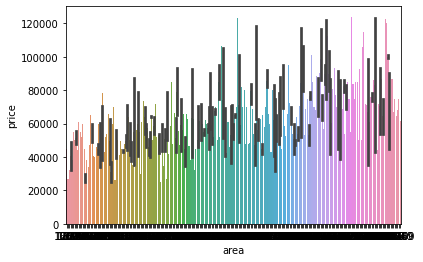

In [304]:
sns.barplot(house_new_data2.area, house_new_data2.price)

In [305]:
house_new_data2 = house_new_data2.drop(columns = ['floors'])

In [306]:
house_new_data2.head()

,price,area,rooms,cellar,air,garage
0,42000,5850,3,1,0,1
1,38500,4000,2,0,0,0
2,49500,3060,3,0,0,0
3,60500,6650,3,0,0,0
4,61000,6360,2,0,0,0


In [307]:
house_new_data2 = house_new_data2.drop(columns = ['garage'])

In [308]:
house_new_data2 = house_new_data2.drop(columns = ['cellar'])

In [309]:
house_new_data2 = house_new_data2.drop(columns = ['rooms'])

In [310]:
house_new_data2.head()

,price,area,air
0,42000,5850,0
1,38500,4000,0
2,49500,3060,0
3,60500,6650,0
4,61000,6360,0


In [311]:
house_new_data2.shape

(461, 3)

In [312]:
lm = LinearRegression()

In [313]:
# let's do the split of the dataset
house_new_data2.columns

Index(['price', 'area', 'air'], dtype='object')

In [314]:
X = house_new_data2[['area','air']]

Y = house_new_data2['price']

In [339]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3)

In [340]:
X_test.head()

,area,air
438,5360,0
228,6321,1
62,4280,1
360,6600,1
514,6060,0


In [341]:
# Now let's build the model using sklearn
lm.fit(X_train, Y_train)

LinearRegression()

In [342]:
lm.score(X_test, Y_test)

0.38690009145500337